<a href="https://colab.research.google.com/github/ZahraMousakhani/CS-SBU-NeuralNetwork_MSc2021-projects/blob/main/ZahraMousakhani-99422187/project2/assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

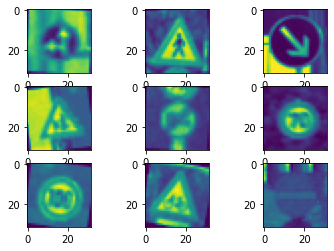

In [ ]:
object = pd.read_pickle(r'/content/drive/MyDrive/data0.pickle')
for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(object['x_train'][i][0])
plt.show()

checking different class sizes

In [ ]:
print (type(object['y_train']))
(unique, counts) = np.unique(object['y_train'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print (frequencies)

<class 'numpy.ndarray'>
[[   0 2023]
 [   1 2023]
 [   2 2023]
 [   3 2023]
 [   4 2023]
 [   5 2023]
 [   6 2023]
 [   7 2023]
 [   8 2023]
 [   9 2023]
 [  10 2023]
 [  11 2023]
 [  12 2023]
 [  13 2023]
 [  14 2023]
 [  15 2023]
 [  16 2023]
 [  17 2023]
 [  18 2023]
 [  19 2023]
 [  20 2023]
 [  21 2023]
 [  22 2023]
 [  23 2023]
 [  24 2023]
 [  25 2023]
 [  26 2023]
 [  27 2023]
 [  28 2023]
 [  29 2023]
 [  30 2023]
 [  31 2023]
 [  32 2023]
 [  33 2023]
 [  34 2023]
 [  35 2023]
 [  36 2023]
 [  37 2023]
 [  38 2023]
 [  39 2023]
 [  40 2023]
 [  41 2023]
 [  42 2023]]


In [ ]:
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

**Data Augmentation** : rotation

In [ ]:
final_train_data = []
final_target_train = []
for i in tqdm(range(object['x_train'].shape[0])):
    final_train_data.append(object['x_train'][i])
    final_target_train.append(object['y_train'][i])
    if (i % 10 == 0):
      final_train_data.append(rotate(object['x_train'][i], angle=45, mode = 'wrap'))
      final_target_train.append(object['y_train'][i])

100%|██████████| 86989/86989 [00:02<00:00, 30854.98it/s]


**Data Augmentation** : left_to_right_flip

In [ ]:
final_train_data = []
final_target_train = []
for i in tqdm(range(object['x_train'].shape[0])):
    final_train_data.append(object['x_train'][i])
    final_target_train.append(object['y_train'][i])
    if (i % 10 == 0):
      final_target_train.append(object['y_train'][i])
      final_train_data.append(np.fliplr(object['x_train'][i]))

**Data Augmentation** : up_to_down_flip


In [ ]:
final_train_data = []
final_target_train = []
for i in tqdm(range(object['x_train'].shape[0])):
    final_train_data.append(object['x_train'][i])
    final_target_train.append(object['y_train'][i])
    if (i % 10 == 0):
      final_target_train.append(object['y_train'][i])
      final_train_data.append(np.flipud(object['x_train'][i]))

**Data Augmentation** : random noise

In [ ]:
final_train_data = []
final_target_train = []
for i in tqdm(range(object['x_train'].shape[0])):
    final_train_data.append(object['x_train'][i])
    final_target_train.append(object['y_train'][i])
    if (i % 10 == 0):
      final_target_train.append(object['y_train'][i])
      final_train_data.append(random_noise(object['x_train'][i],var=0.2**2))

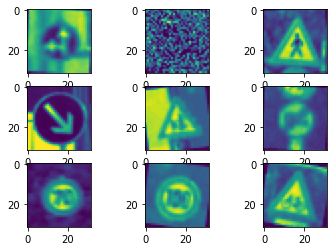

In [ ]:
for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(final_train_data[i][0])
plt.show()

In [ ]:
len(final_target_train), len(final_train_data)
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BATCH_SIZE = 250
torch_X_train = torch.from_numpy(final_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(final_target_train).type(torch.LongTensor) 
print (torch_X_train.shape)
print (torch_y_train.shape)

torch.Size([95688, 3, 32, 32])
torch.Size([95688])


In [ ]:
print (torch_X_train.shape)
torch_X_test = torch.from_numpy(object['x_test']).type(torch.LongTensor)
torch_X_test = torch_X_test.view(-1,3,32,32).float()
torch_X_train = torch_X_train.view(-1,3,32,32).float()
torch_y_test = torch.from_numpy(object['y_test']).type(torch.LongTensor)
print (torch_X_test.shape)
print(torch_y_test.shape)
print (torch_X_train.shape)
print(torch_y_train.shape)
torch_X_validation = torch.from_numpy(object['x_validation']).type(torch.LongTensor)
torch_y_validation = torch.from_numpy(object['y_validation']).type(torch.LongTensor)

torch.Size([95688, 3, 32, 32])
torch.Size([12630, 3, 32, 32])
torch.Size([12630])
torch.Size([95688, 3, 32, 32])
torch.Size([95688])


In [ ]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
valiation = torch.utils.data.TensorDataset(torch_X_validation,torch_y_validation)

In [ ]:
# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)
validation_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, kernel_size=3)
        self.conv2 = nn.Conv2d(12, 32, kernel_size=3)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv2_drop = nn.Dropout2d()
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3_bn = nn.BatchNorm2d(64)
        #self.conv4 = nn.Conv2d(42, 64, kernel_size=3)
        self.conv3_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 150)
        self.fc2 = nn.Linear(150, 43)
        #self.fc3 = nn.Linear(150, 43)
        #self.features = nn.Sequential(*list(vgg16_bn.features)[:-1])

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2_bn(self.conv2(x))), 2))
        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3_bn(self.conv3(x))), 2))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)
        #x = self.fc3(x)
        return F.log_softmax(x)

In [ ]:
#get some random training images
dataiter = iter (train_loader)
images, labels = dataiter.next ()
conv1 = nn.Conv2d(3, 12, kernel_size=3)
pool = nn.MaxPool2d (2,2)
conv2 = nn.Conv2d (12, 32, kernel_size=3)
conv3 = nn.Conv2d (32, 64, kernel_size=2)
conv2_bn = nn.BatchNorm2d(32)
conv3_bn = nn.BatchNorm2d(64)
conv4 = nn.Conv2d (32, 64, kernel_size=2)
drop = nn.Dropout2d()
print (images.shape)
x = conv1(images)
print (x.shape)
x = pool (x)
print (x.shape)
x = conv2(x)
print (x.shape)
x = conv2_bn(x)
print (x.shape)
x = drop (x)
print (x.shape)
x = pool (x)
print (x.shape)
x = conv3(x)
print (x.shape)
x = conv3_bn(x)
print (x.shape)
x = drop (x)
print (x.shape)
x = pool (x)
print (x.shape)


torch.Size([250, 3, 32, 32])
torch.Size([250, 12, 30, 30])
torch.Size([250, 12, 15, 15])
torch.Size([250, 32, 13, 13])
torch.Size([250, 32, 13, 13])
torch.Size([250, 32, 13, 13])
torch.Size([250, 32, 6, 6])
torch.Size([250, 64, 5, 5])
torch.Size([250, 64, 5, 5])
torch.Size([250, 64, 5, 5])
torch.Size([250, 64, 2, 2])


In [ ]:
cnn = CNN()
print(cnn)
print (torch.cuda.is_available())

CNN(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=43, bias=True)
)
True


In [ ]:
if torch.cuda.is_available():
    cnn = cnn.cuda()

In [ ]:
it = iter(train_loader)
X_batch, y_batch = next(it)
print(X_batch.shape)
print(y_batch.shape)

if torch.cuda.is_available():
    X_batch = X_batch.cuda()
    y_batch = y_batch.cuda()
    
print(cnn.forward(X_batch).shape)

torch.Size([250, 3, 32, 32])
torch.Size([250])
torch.Size([250, 43])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
for batch_idx, (data, target) in enumerate(train_loader):
    if batch_idx == 0:
        print(data.shape)
        print(target.shape)

torch.Size([250, 3, 32, 32])
torch.Size([250])


In [ ]:
learning_rate = 0.01
momentum = 0.5
n_epochs = 100
model = CNN()
optimizer = optim.SGD (cnn.parameters(), lr = learning_rate, momentum= momentum)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0.5, centered=False)

In [ ]:
train_losses = []
train_counter = []
test_losses = []

In [ ]:
def train(epoch):
    cnn.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()

        output = cnn(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 25 == 0: #every 25 * batchsize sample we print results
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
      
        train_loss += loss.item()

    train_losses.append(train_loss)
    train_counter.append(epoch)

    torch.save(cnn.state_dict(), 'model.pth')
    torch.save(cnn.state_dict(), 'optimizer.pth')

In [ ]:
def test():
  cnn.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:

        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()

        output = cnn(data)
        test_loss += F.nll_loss(output, target, size_average=False).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()

  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
def normalize_output(img):
    img = img - img.min()
    img = img / img.max()
    return img

In [ ]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/95688 (0%)]	Loss: 3.817827
Train Epoch: 1 [6250/95688 (7%)]	Loss: 3.777662
Train Epoch: 1 [12500/95688 (13%)]	Loss: 3.797382
Train Epoch: 1 [18750/95688 (20%)]	Loss: 3.762226
Train Epoch: 1 [25000/95688 (26%)]	Loss: 3.740340
Train Epoch: 1 [31250/95688 (33%)]	Loss: 3.720516
Train Epoch: 1 [37500/95688 (39%)]	Loss: 3.716302
Train Epoch: 1 [43750/95688 (46%)]	Loss: 3.717318
Train Epoch: 1 [50000/95688 (52%)]	Loss: 3.686035
Train Epoch: 1 [56250/95688 (59%)]	Loss: 3.696246
Train Epoch: 1 [62500/95688 (65%)]	Loss: 3.654605
Train Epoch: 1 [68750/95688 (72%)]	Loss: 3.640217
Train Epoch: 1 [75000/95688 (78%)]	Loss: 3.652872
Train Epoch: 1 [81250/95688 (85%)]	Loss: 3.575917
Train Epoch: 1 [87500/95688 (91%)]	Loss: 3.586276
Train Epoch: 1 [93750/95688 (98%)]	Loss: 3.576102


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 3.5577, Accuracy: 485/12630 (4%)

Train Epoch: 2 [0/95688 (0%)]	Loss: 3.569069
Train Epoch: 2 [6250/95688 (7%)]	Loss: 3.625303
Train Epoch: 2 [12500/95688 (13%)]	Loss: 3.617180
Train Epoch: 2 [18750/95688 (20%)]	Loss: 3.569948
Train Epoch: 2 [25000/95688 (26%)]	Loss: 3.524859
Train Epoch: 2 [31250/95688 (33%)]	Loss: 3.523219
Train Epoch: 2 [37500/95688 (39%)]	Loss: 3.492967
Train Epoch: 2 [43750/95688 (46%)]	Loss: 3.541981
Train Epoch: 2 [50000/95688 (52%)]	Loss: 3.486259
Train Epoch: 2 [56250/95688 (59%)]	Loss: 3.530911
Train Epoch: 2 [62500/95688 (65%)]	Loss: 3.462337
Train Epoch: 2 [68750/95688 (72%)]	Loss: 3.481845
Train Epoch: 2 [75000/95688 (78%)]	Loss: 3.536298
Train Epoch: 2 [81250/95688 (85%)]	Loss: 3.408309
Train Epoch: 2 [87500/95688 (91%)]	Loss: 3.456947
Train Epoch: 2 [93750/95688 (98%)]	Loss: 3.407416

Test set: Avg. loss: 3.3772, Accuracy: 1041/12630 (8%)

Train Epoch: 3 [0/95688 (0%)]	Loss: 3.496197
Train Epoch: 3 [6250/95688 (7%)]	Loss: 3.491481
T

Text(0, 0.5, 'negative log likelihood loss')

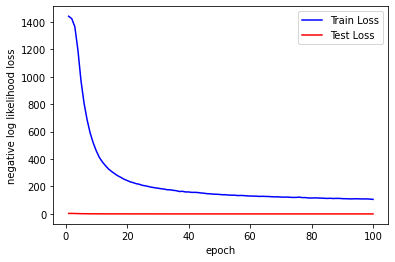

In [ ]:
plt.plot(train_counter, train_losses, color='blue')
plt.plot(range(1,len(test_losses)+1,1), test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('negative log likelihood loss')


In [ ]:
model = CNN()
model.load_state_dict(torch.load('/content/model.pth',map_location=torch.device('cpu')))
#model.load_state_dict(torch.load('/content/sample_data/model (2).pth'))
print ("model description:")
model.eval()


model description:


CNN(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(42, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=43, bias=True)
)

In [ ]:
def custom_viz(kernels, path=None, cols=None):
  def set_size(w,h, ax=None):
    if not ax:  ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
  N = kernels.shape[0]
  C = kernels.shape[1]

  Tot = N*C

# If single channel kernel with HxW size,# plot them in a row.# Else, plot image with C number of columns.
  if C>1:
    columns = C
  elif cols==None:
    columns = N
  elif cols:
    columns = cols
  rows = Tot // columns 
  rows += Tot % columns

  pos = range(1,Tot + 1)

  fig = plt.figure(1)
  fig.tight_layout()
  k=0
  for i in range(kernels.shape[0]):
    for j in range(kernels.shape[1]):
      img = kernels[i][j]
      ax = fig.add_subplot(rows,columns,pos[k])
      ax.imshow(img)
      plt.axis('off')
      k = k+1

  set_size(30,30,ax)
  if path:
    plt.savefig(path, dpi=100)
    
  plt.show()

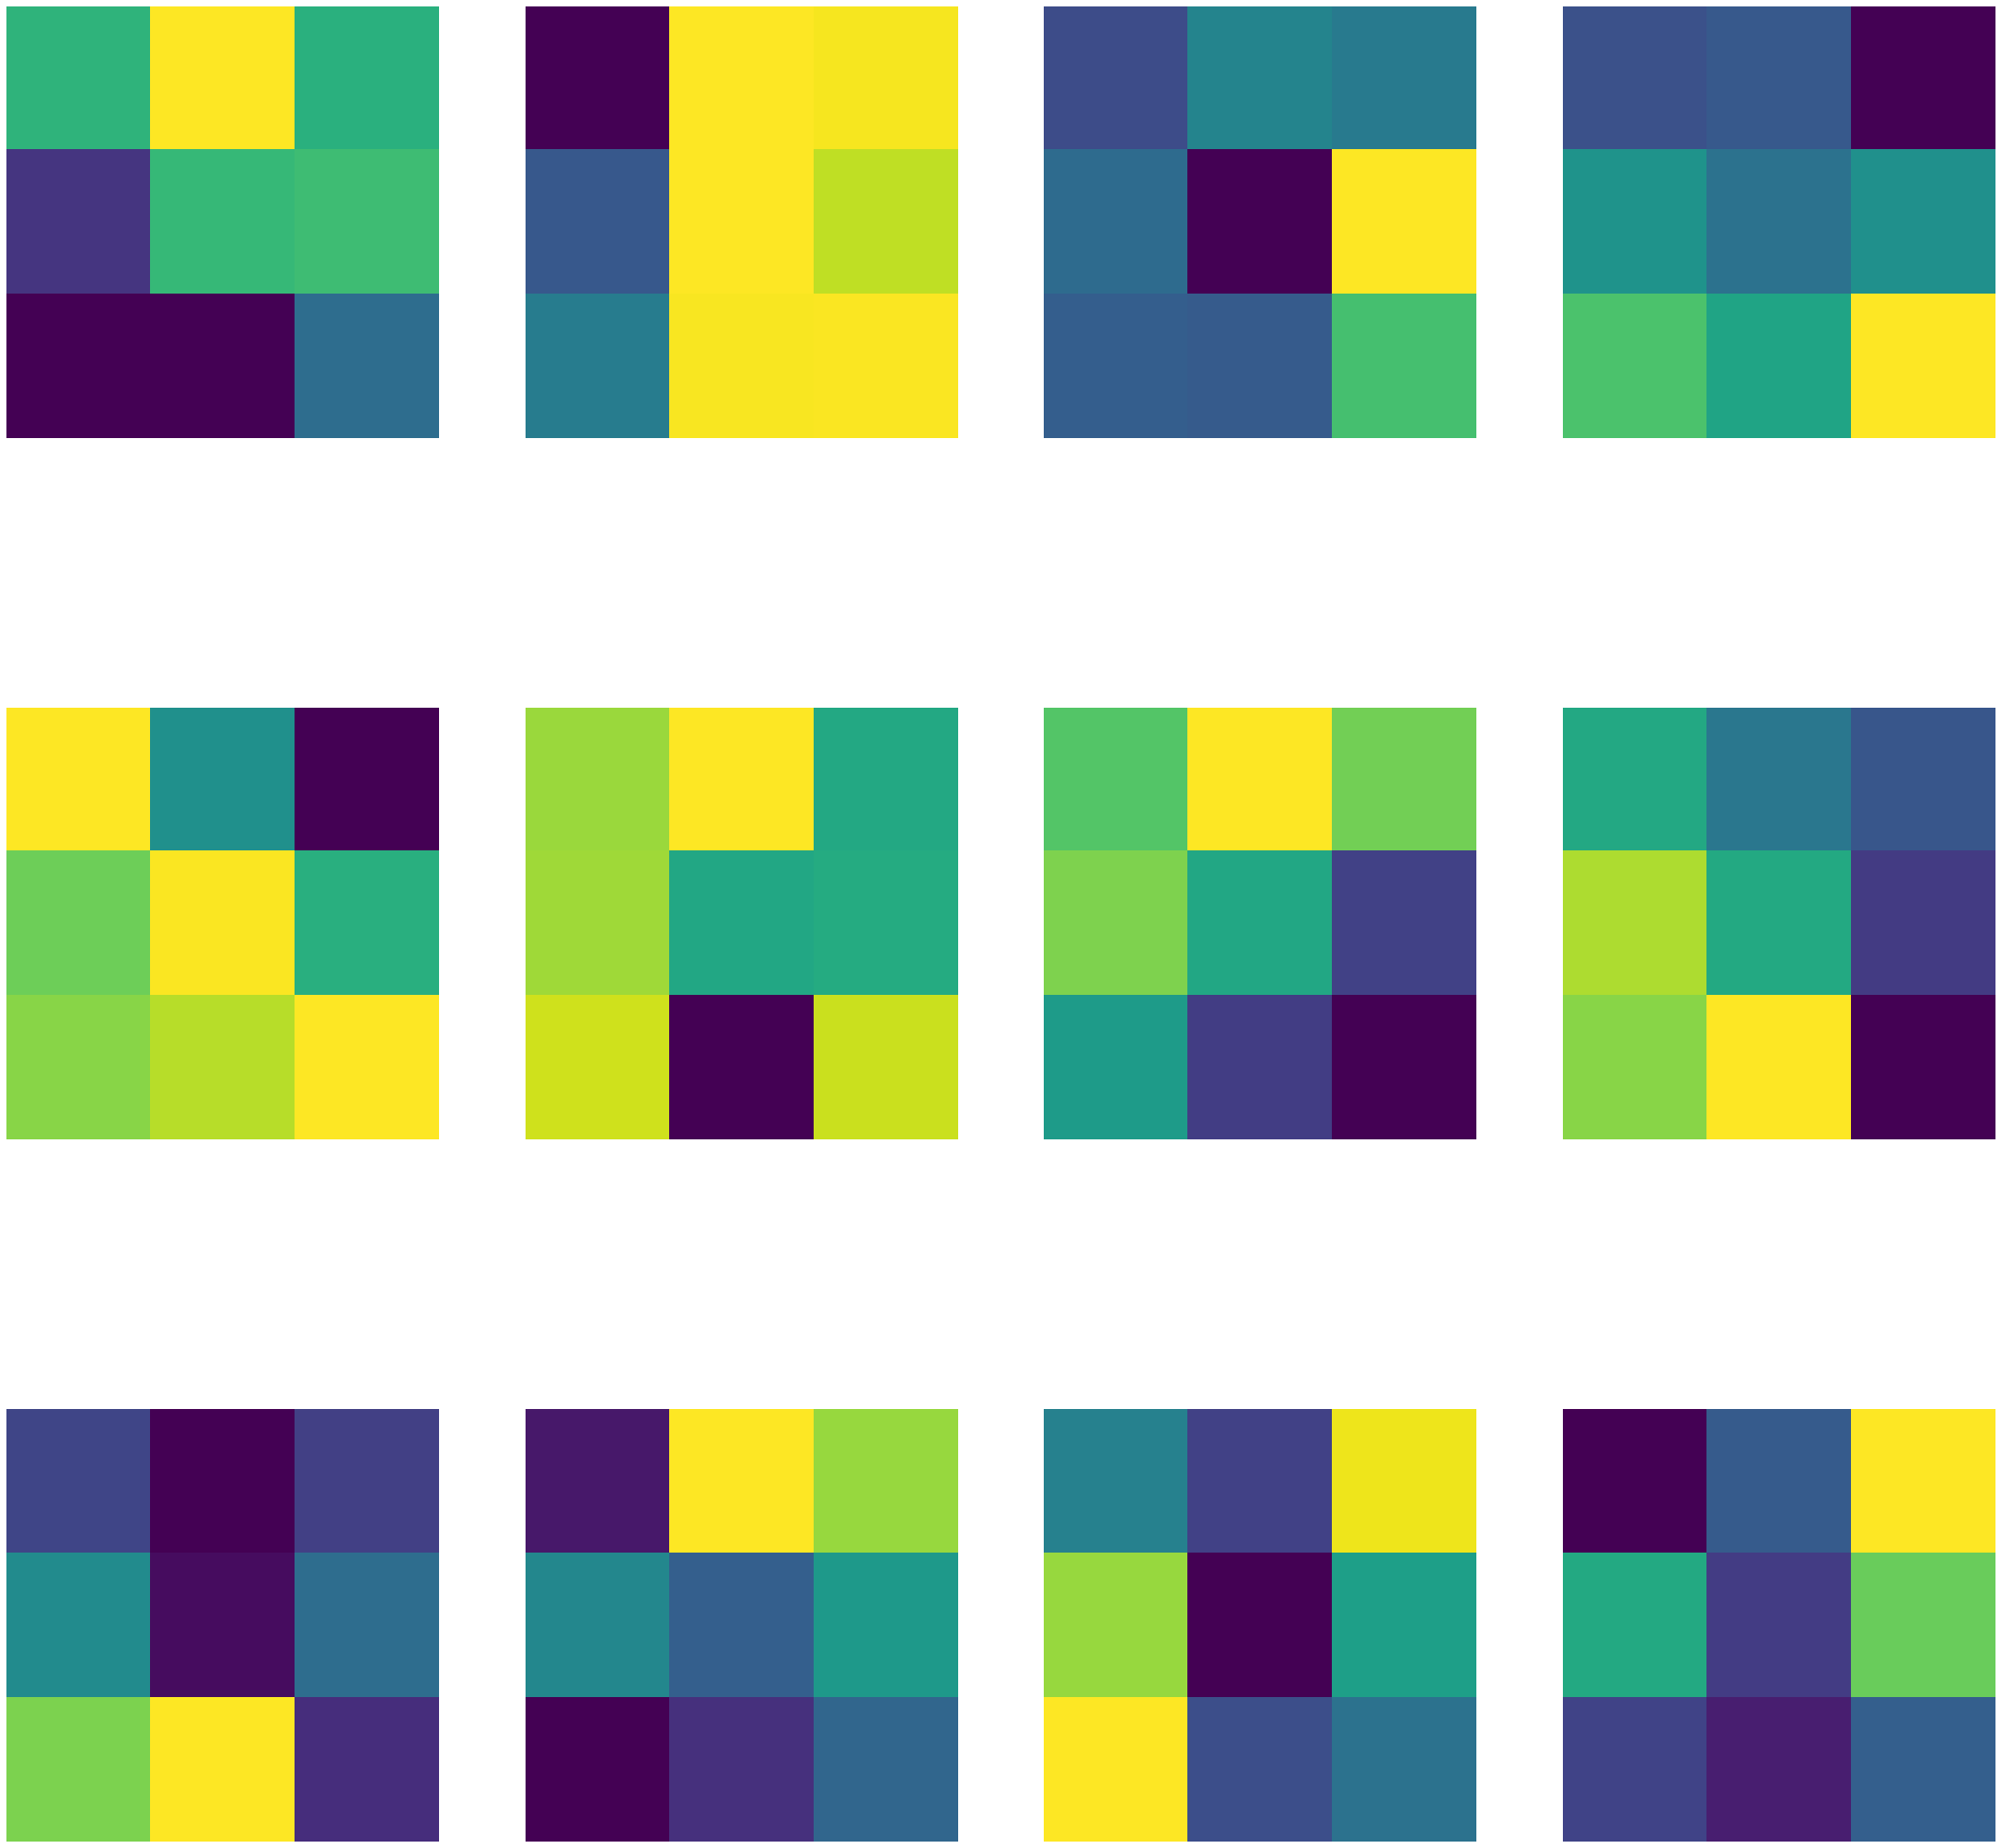

In [ ]:
kernels = model.conv1.weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels, '/content/drive/MyDrive/Colab Notebooks/conv1_weights', 4)

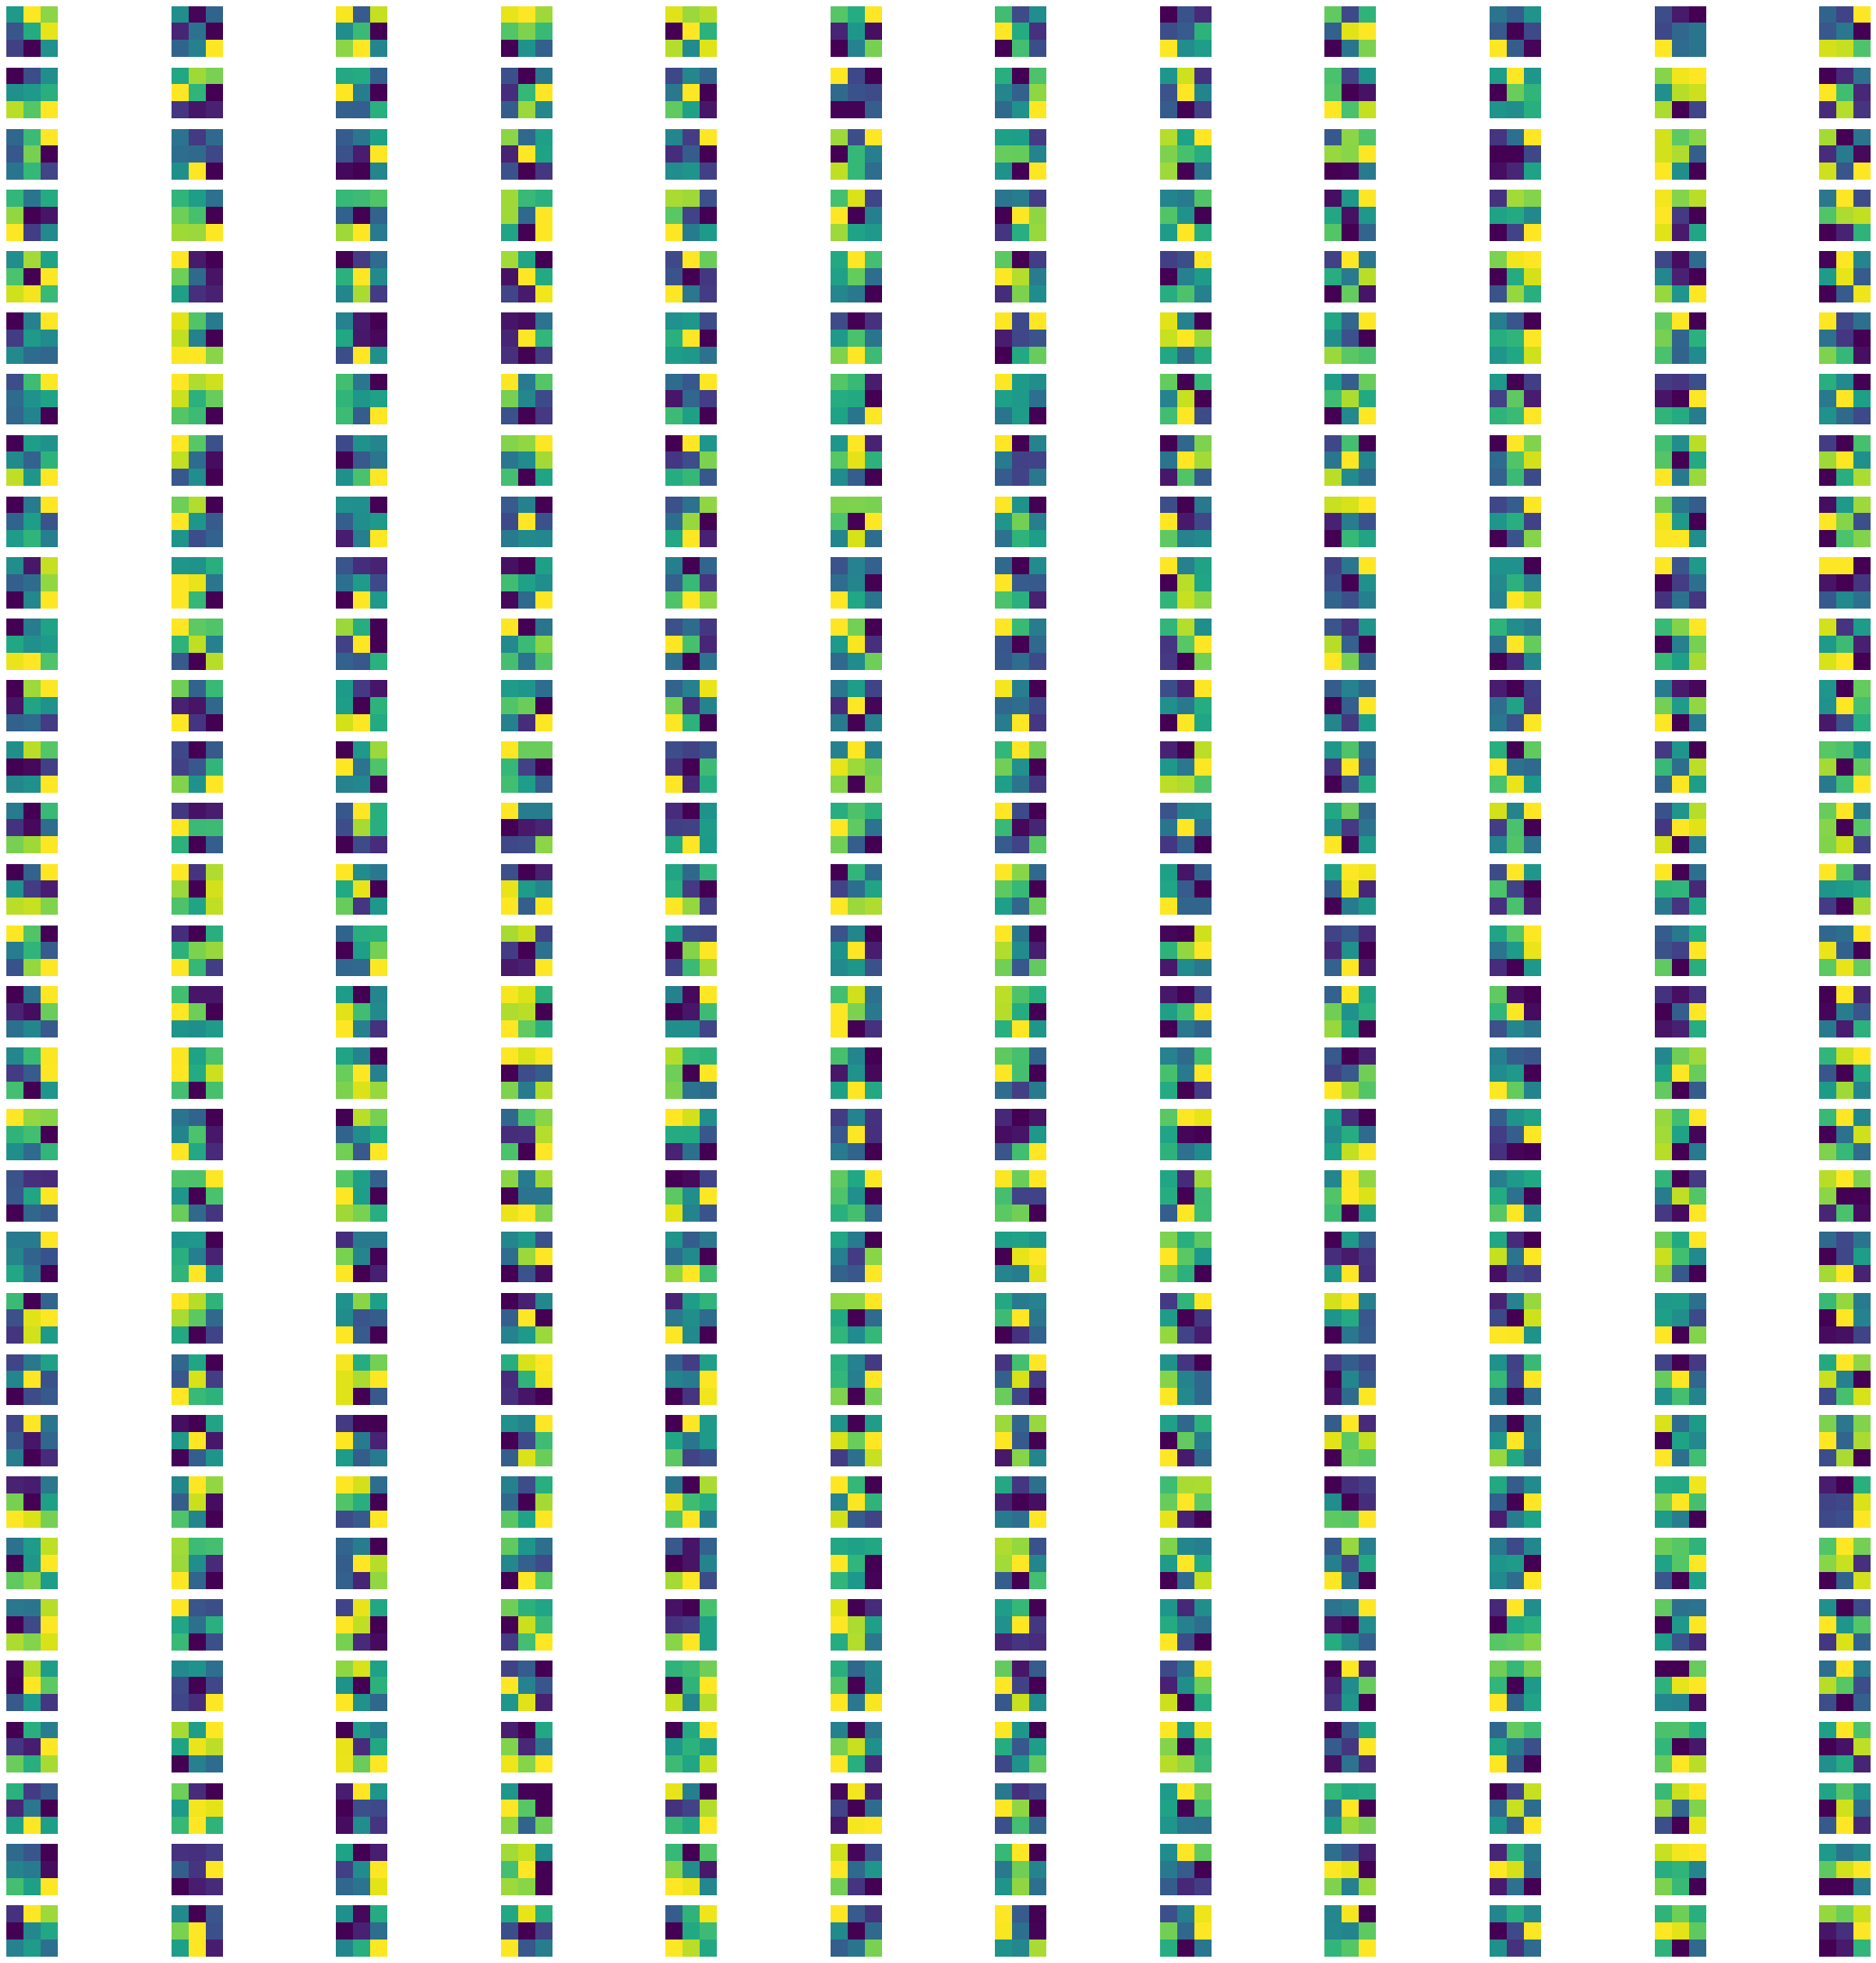

In [ ]:
kernels = model.conv2.weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels, '/content/drive/MyDrive/Colab Notebooks/conv2_weights.png')

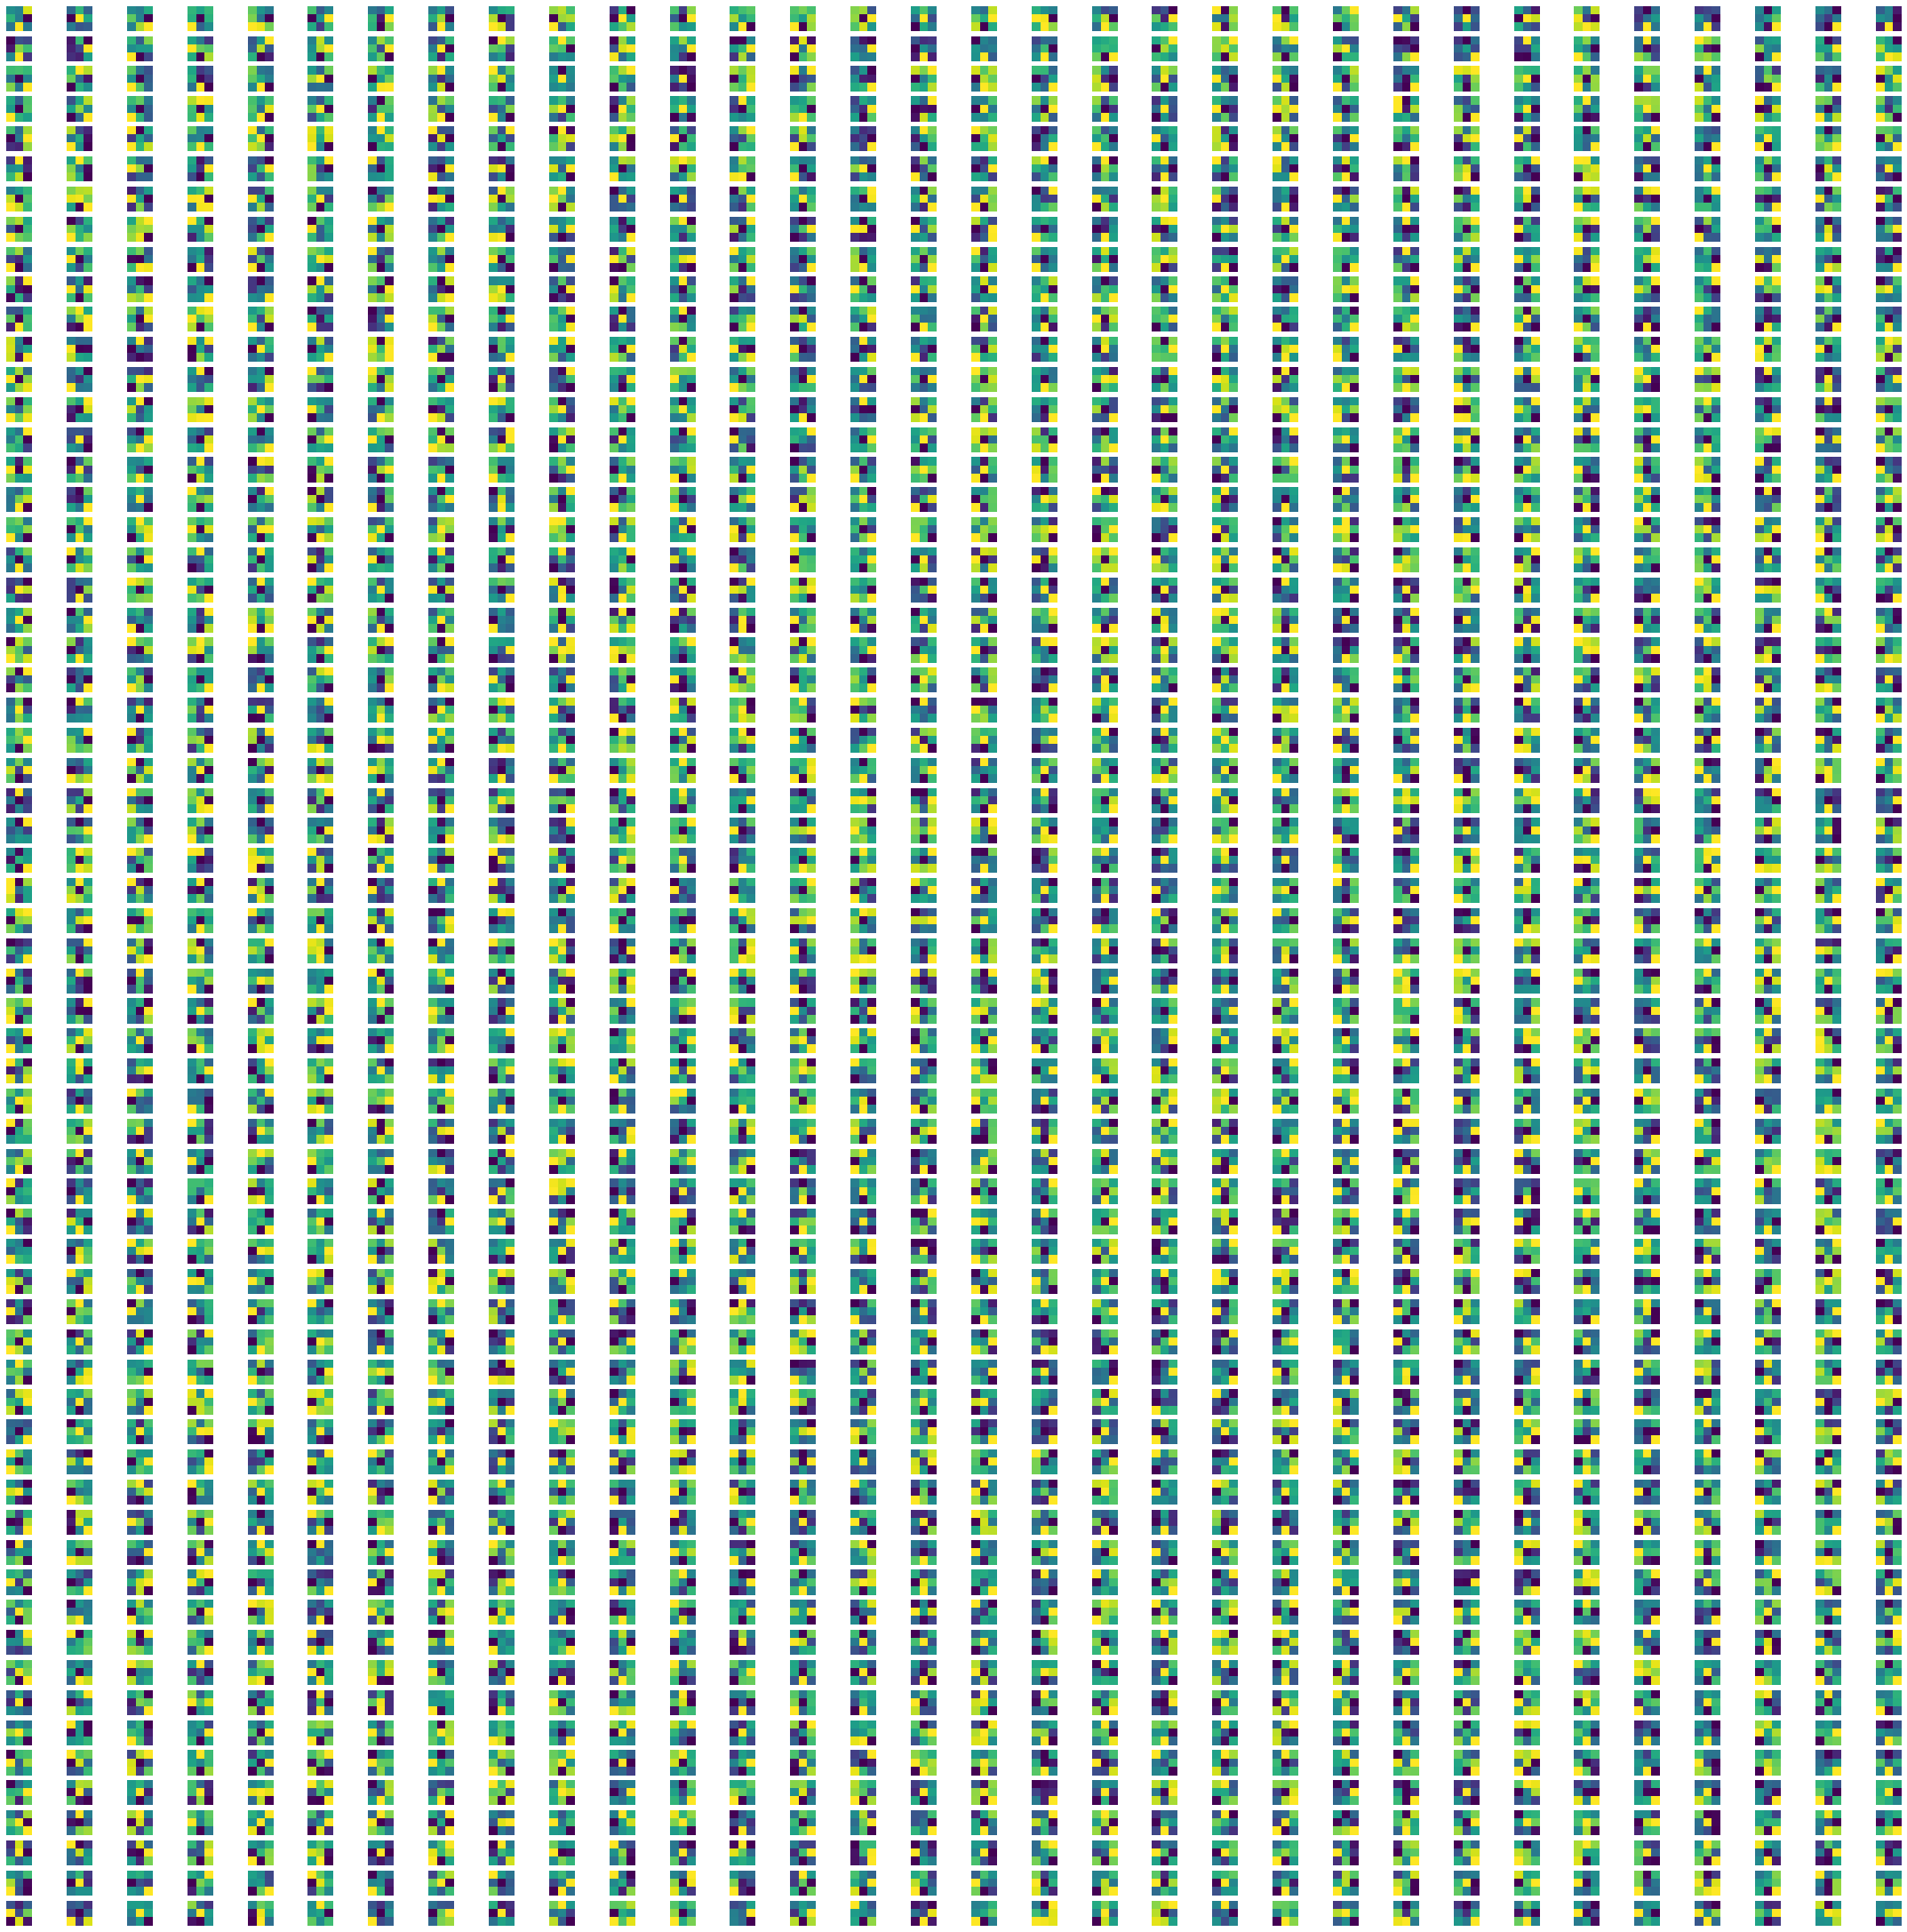

In [ ]:
kernels = model.conv3.weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels, '/content/drive/MyDrive/Colab Notebooks/conv3_weights.png')

In [ ]:

examples = iter(test_loader)
example_data, example_targets = next(examples)
print (example_data.shape)
number = example_data[4]
number.unsqueeze_(0)
print (number)
#number =Variable(number,requires_grad=True)

#print("Predicted Class: ", np.argmax(model.forward(number.cuda()).cpu().detach().numpy()))

torch.Size([250, 3, 32, 32])
tensor([[[[ 23.,  23.,  23.,  ..., 121., 126., 126.],
          [ 23.,  22.,  21.,  ..., 121., 117., 121.],
          [ 21.,  21.,  20.,  ...,  87., 112., 115.],
          ...,
          [ 19.,  19.,  19.,  ...,  18.,  17.,  18.],
          [ 19.,  18.,  19.,  ...,  18.,  19.,  19.],
          [ 19.,  19.,  17.,  ...,  17.,  17.,  18.]],

         [[ 24.,  24.,  24.,  ..., 134., 144., 144.],
          [ 22.,  23.,  22.,  ..., 124., 136., 137.],
          [ 21.,  21.,  20.,  ...,  90., 119., 128.],
          ...,
          [ 18.,  18.,  18.,  ...,  18.,  17.,  18.],
          [ 18.,  17.,  18.,  ...,  17.,  19.,  19.],
          [ 19.,  19.,  17.,  ...,  17.,  18.,  19.]],

         [[ 30.,  29.,  29.,  ..., 159., 173., 174.],
          [ 28.,  28.,  27.,  ..., 146., 161., 164.],
          [ 25.,  26.,  26.,  ..., 106., 138., 151.],
          ...,
          [ 22.,  22.,  22.,  ...,  22.,  20.,  21.],
          [ 22.,  20.,  20.,  ...,  22.,  23.,  24.],
    

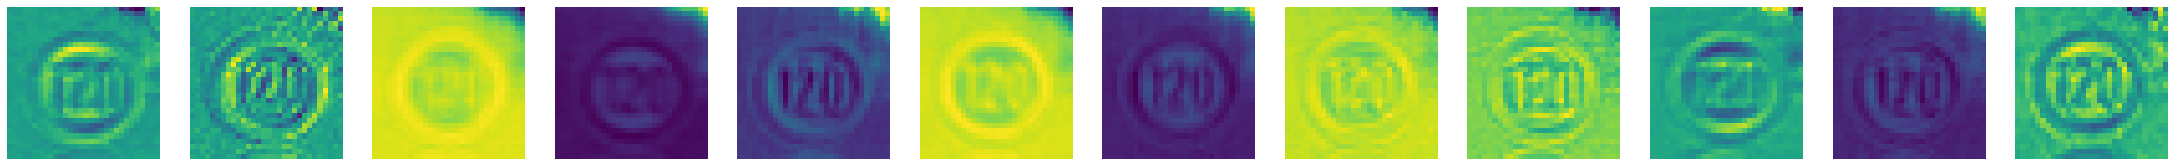

In [ ]:
conv1_out = model.conv1.forward(number)
custom_viz(conv1_out.cpu().detach().clone(), '/content/drive/MyDrive/Colab Notebooks/conv1_actv.png')

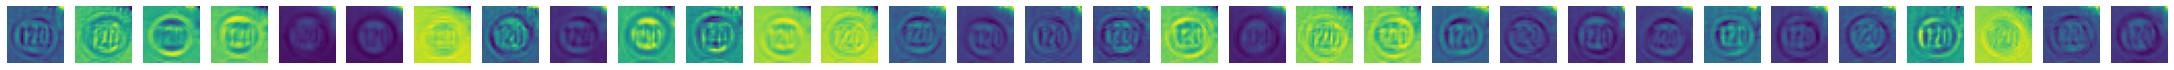

In [ ]:
conv2_out = model.conv2.forward(conv1_out)
custom_viz(conv2_out.cpu().detach().clone(), '/content/drive/MyDrive/Colab Notebooks/conv2_actv.png')

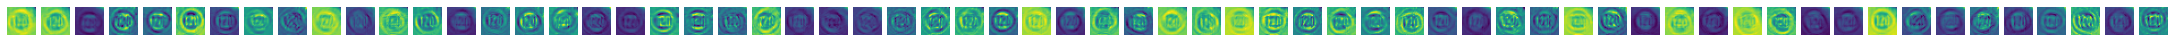

In [ ]:
conv3_out = model.conv3.forward(conv2_out)
custom_viz(conv3_out.cpu().detach().clone(), '/content/drive/MyDrive/Colab Notebooks/conv3_actv.png')